<a href="https://colab.research.google.com/github/velliyangiri07/ML-projects/blob/main/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/preprocessing_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        10 non-null     object 
 1   Age         9 non-null      float64
 2   Gender      9 non-null      object 
 3   Salary      9 non-null      float64
 4   Department  10 non-null     object 
dtypes: float64(2), object(3)
memory usage: 532.0+ bytes


# **1. To find the Missing Values**


In [ ]:
df.isnull().sum()

,0
Name,0
Age,1
Gender,1
Salary,1
Department,0


<Axes: >

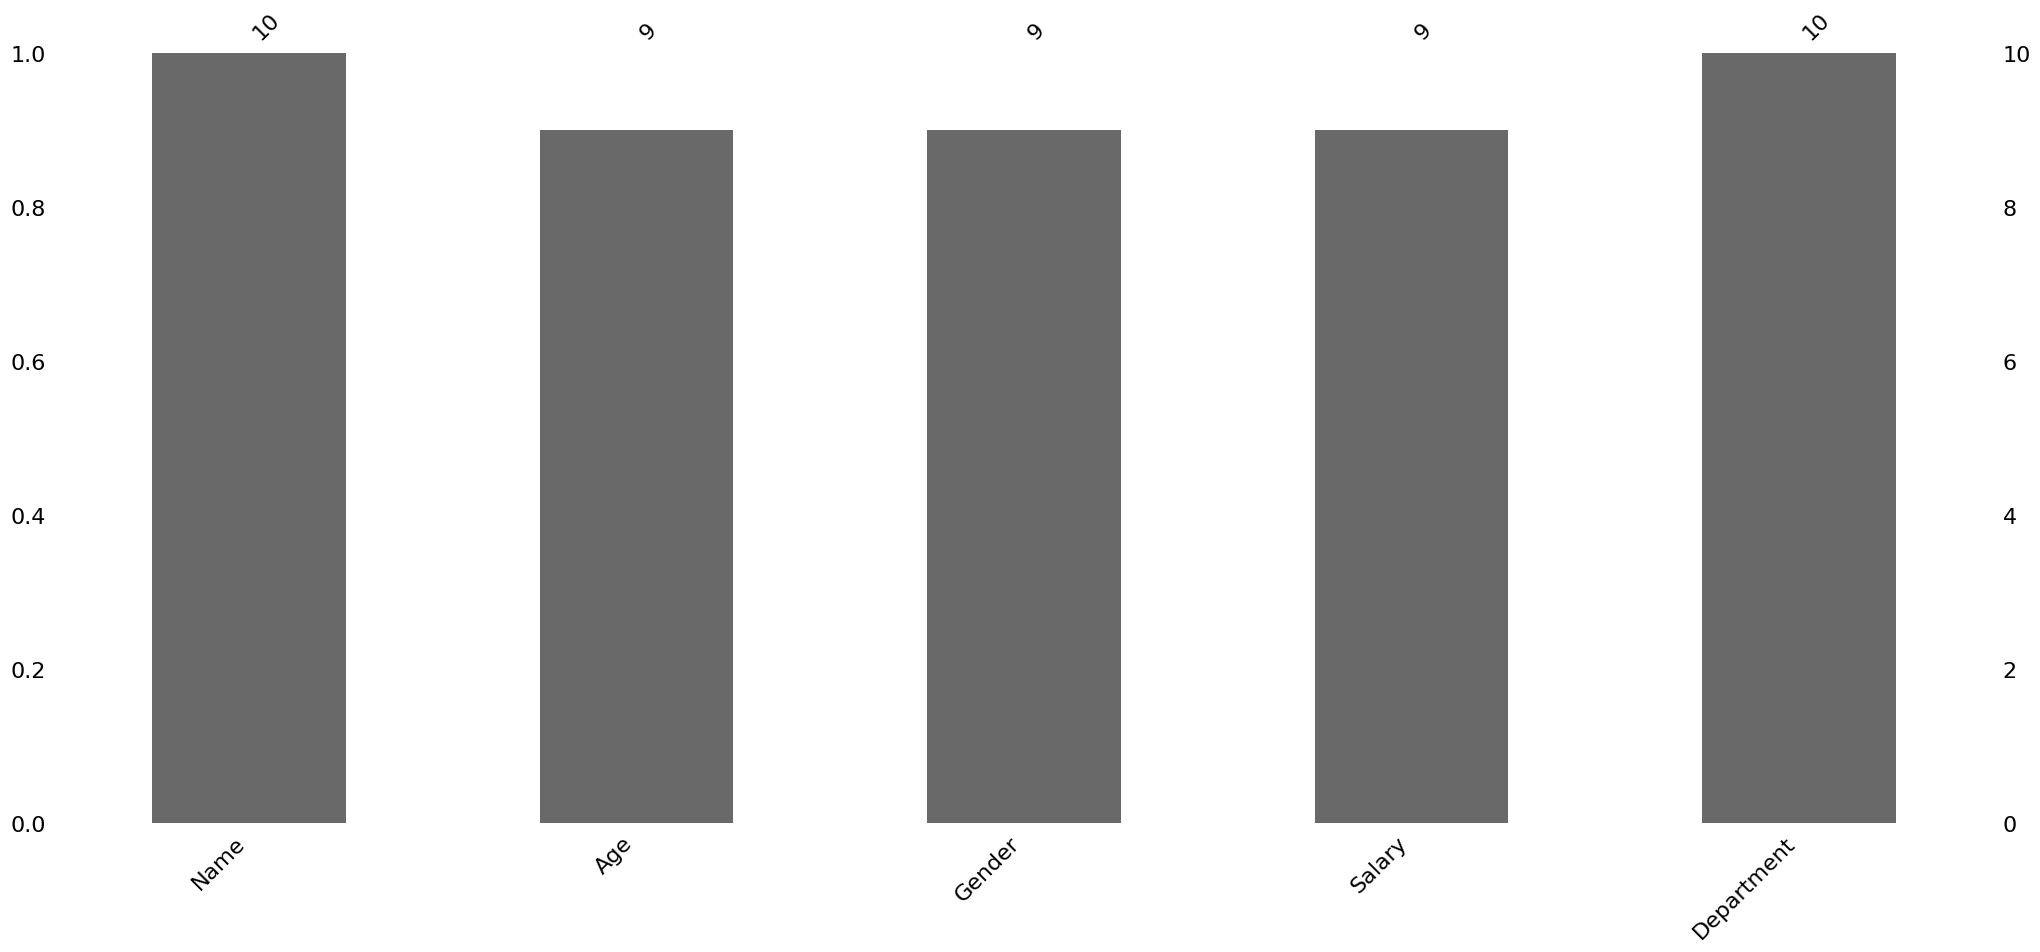

In [ ]:
#To visually find the missing values
!pip install missingno
import missingno as msno
msno.bar(df)

<Axes: >

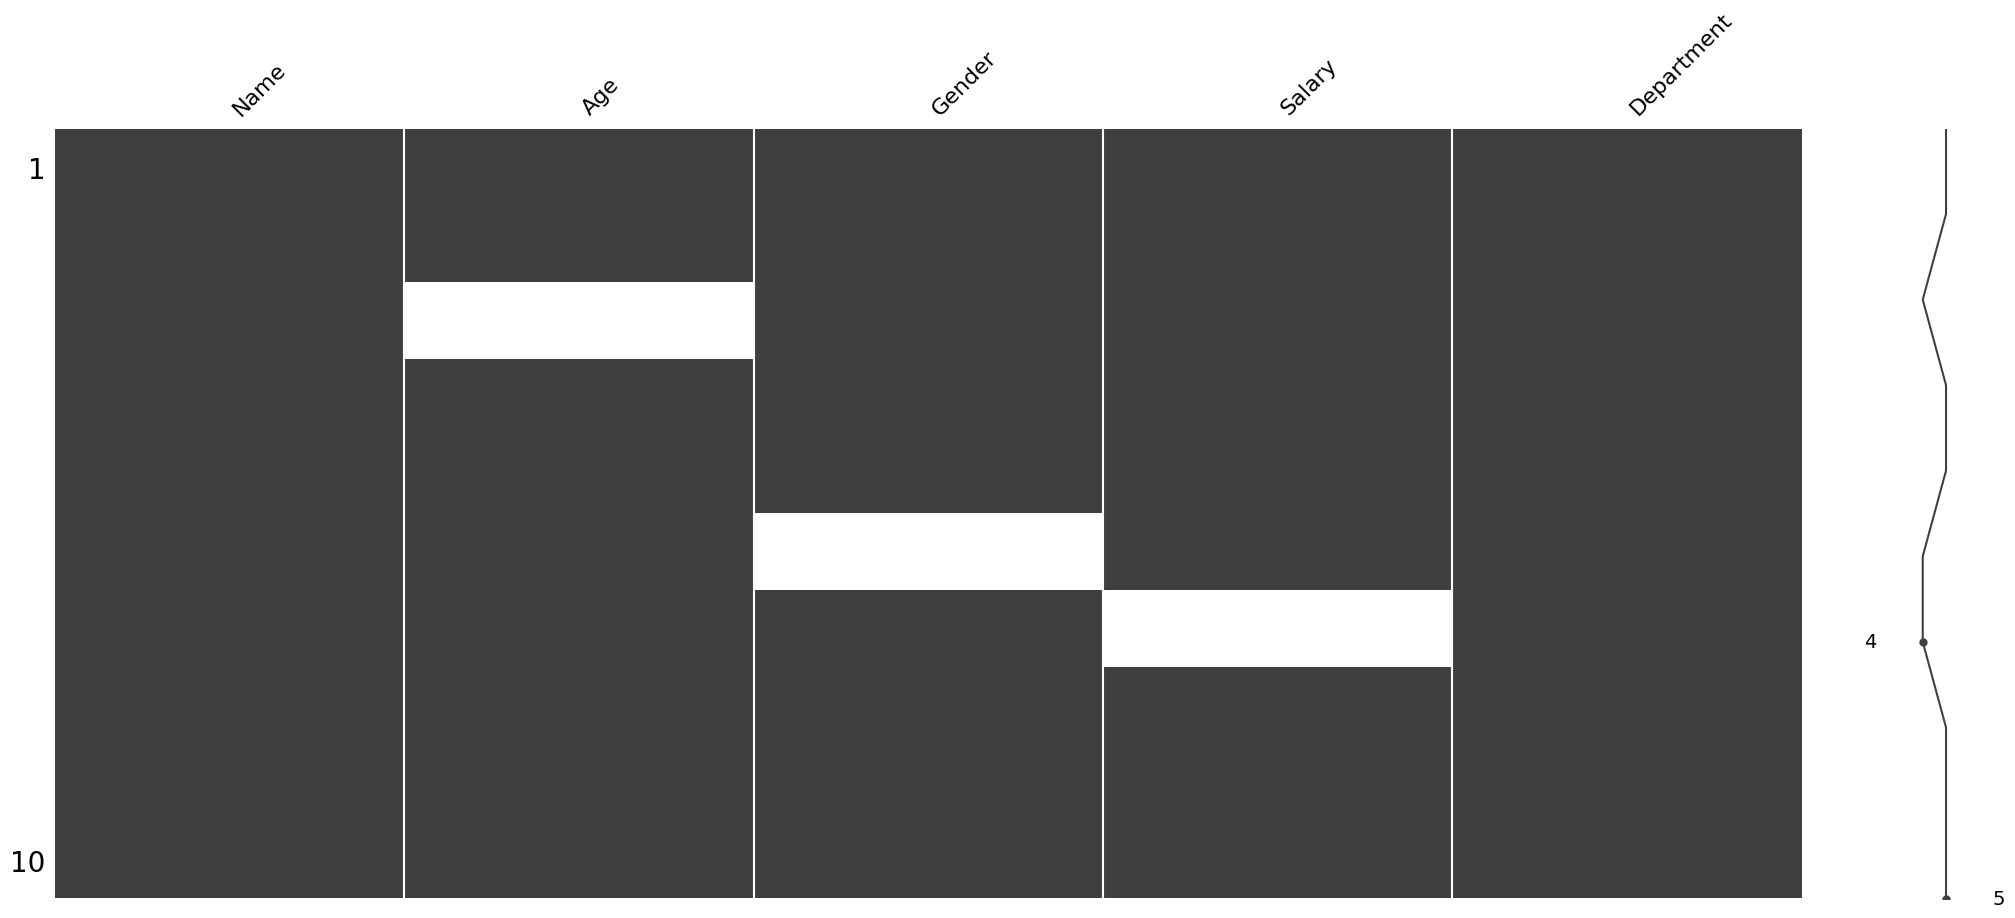

In [ ]:
# to find in which place that the missing values present in the dataset via visually
msno.matrix(df)

<Axes: >

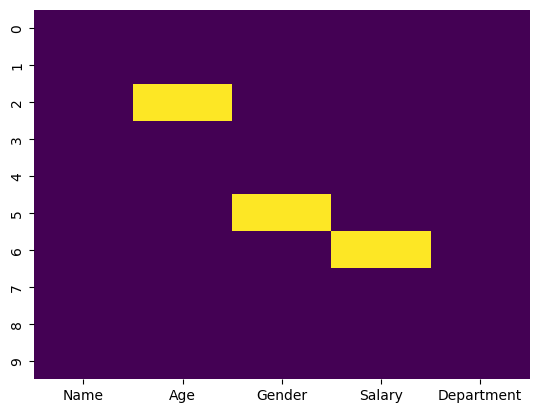

In [ ]:
#to find the missing values via different colors
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

# To Delete the Missing Values

In [ ]:
#to delete the missing values (it is used for only the counting type of rows in a dataset)
# df.dropna(inplace = True)
# df

In [ ]:
# Mean - only for numerical values and continuous data(eg : height, weight of the students)
# Median - When outliers found go to median
# Mode - repeatation
'''df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Salary'].fillna(df['Salary'].median(), inplace= True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df'''

"df['Age'].fillna(df['Age'].mean(), inplace = True)\ndf['Salary'].fillna(df['Salary'].median(), inplace= True)\ndf['Gender'].fillna(df['Gender'].mode()[0], inplace = True)\ndf"

<Axes: >

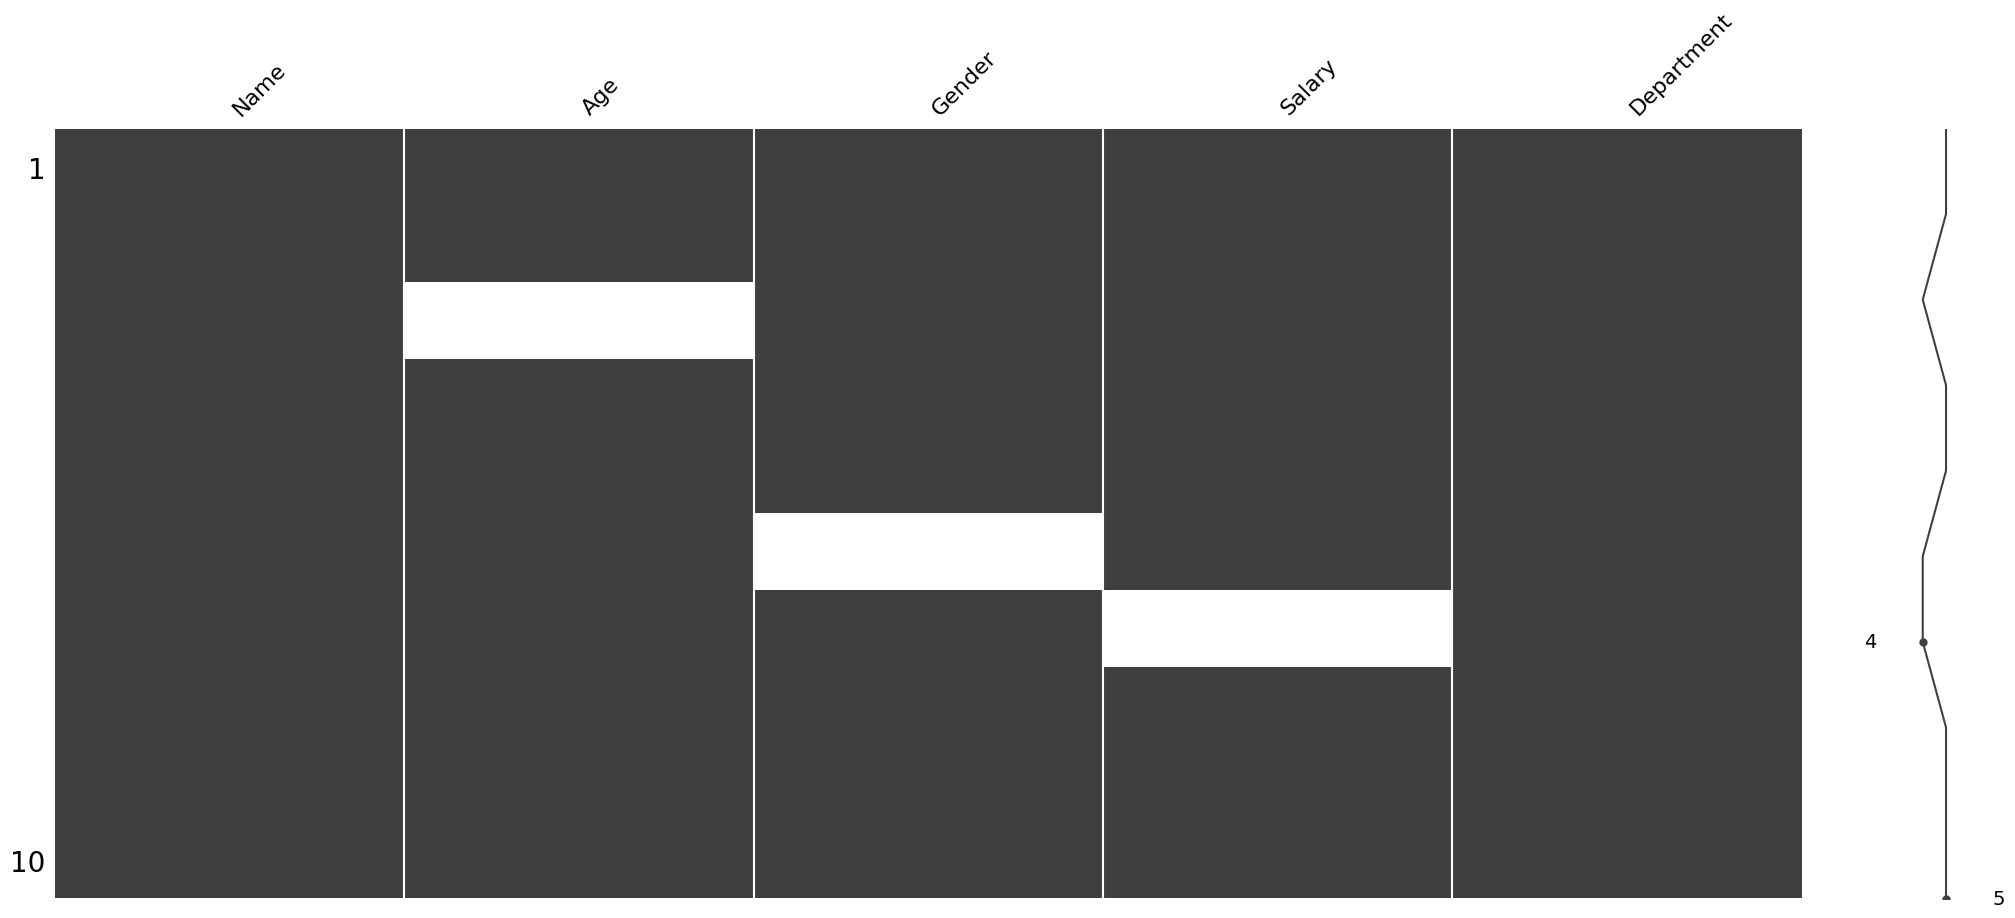

In [ ]:
#to recheck if missing is present or not
msno.matrix(df)

In [ ]:
# SimpleImputer - to handle the missing values (Most asked in the interview)
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'median')
df[['Age']] = imp.fit_transform(df[['Age']])
df

,Name,Age,Gender,Salary,Department
0,Alice,25.0,F,50000.0,HR
1,Bob,30.0,M,60000.0,Finance
2,Charlie,29.0,M,55000.0,IT
3,David,40.0,M,58000.0,HR
4,Eve,22.0,F,52000.0,IT
5,Frank,35.0,NaN,61000.0,Finance
6,Grace,120.0,F,NaN,Finance
7,Henry,28.0,M,59000.0,HR
8,Ivy,29.0,F,63000.0,IT
9,Jack,27.0,M,62000.0,Finance


# 3. To find the outliers

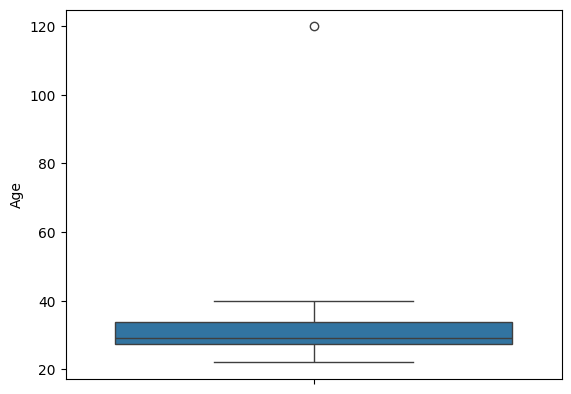

In [ ]:
# outliers - extreme value

sns.boxplot(df['Age'])
plt.show()

In [ ]:
# box plot - works on IQR(Inter Quantile Range)
# q1 = 25%
# q3 = 75%
# iqr = q3-q1
# min = q1 - 1.5*iqr
# max = q3 + 1.5*iqr

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
outliers

,Name,Age,Gender,Salary,Department
6,Grace,120.0,F,NaN,Finance


In [ ]:
# Z- score - greater 3 (all outlier)
# works on sd and variance , to find the outliers

from scipy.stats import zscore

z_scores = zscore(df['Age'])
df[np.abs(z_scores) > 2.5]

,Name,Age,Gender,Salary,Department
6,Grace,120.0,F,NaN,Finance


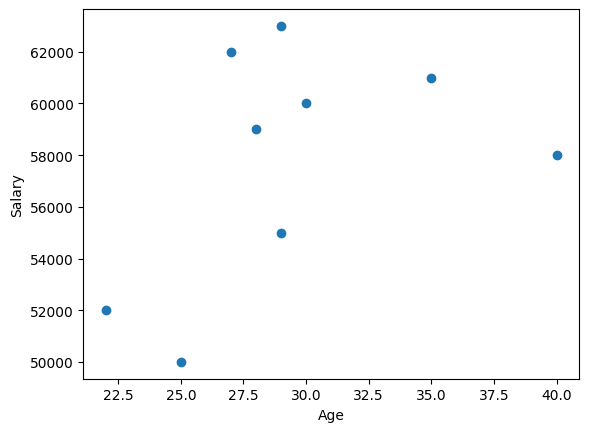

In [ ]:
#to easily found the outliers
plt.scatter(df['Age'], df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [ ]:
# Isolation tree works based on Tree
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination = 0.1) #im telling that error may in 10%(in contamination)
df['outlier'] = iso.fit_predict(df[['Age', 'Salary']])

df[df['outlier'] == -1] # -1 means outlier, 1 means no outlier

,Name,Age,Gender,Salary,Department,outlier
6,Grace,120.0,F,NaN,Finance,-1


# 4. To handle the outliers

In [ ]:
df['Age'] = np.where(df['Age'] > 100, df['Age'].median(), df['Age'])
df

,Name,Age,Gender,Salary,Department,outlier
0,Alice,25.0,F,50000.0,HR,1
1,Bob,30.0,M,60000.0,Finance,1
2,Charlie,29.0,M,55000.0,IT,1
3,David,40.0,M,58000.0,HR,1
4,Eve,22.0,F,52000.0,IT,1
5,Frank,35.0,NaN,61000.0,Finance,1
6,Grace,29.0,F,NaN,Finance,-1
7,Henry,28.0,M,59000.0,HR,1
8,Ivy,29.0,F,63000.0,IT,1
9,Jack,27.0,M,62000.0,Finance,1


In [ ]:
# encoding - converting categorical data(string ) into numerical data
# 1) label encoding

In [ ]:
'''from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#TO MODIFY IN THE EXISTING COLUMN
# df['Gender'] = le.fit_transform(df['Gender']) #converting Gender into 0's and 1's

df['Gender_encoded'] = le.fit_transform(df['Gender']) # add a new column
df'''

"from sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\n#TO MODIFY IN THE EXISTING COLUMN\n# df['Gender'] = le.fit_transform(df['Gender']) #converting Gender into 0's and 1's\n\ndf['Gender_encoded'] = le.fit_transform(df['Gender']) # add a new column\ndf"

In [ ]:
# dummies - change of columns into True or False
# df = pd.get_dummies(df, columns=['Department'], drop_first = False) #drop_first =true - remove the first dummies (here finance is the first dumy so it wont create a column for that )
# df

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
df['Gender']= ohe.fit_transform(df[['Gender']])
df

,Name,Age,Gender,Salary,Department,outlier
0,Alice,25.0,1.0,50000.0,HR,1
1,Bob,30.0,0.0,60000.0,Finance,1
2,Charlie,29.0,0.0,55000.0,IT,1
3,David,40.0,0.0,58000.0,HR,1
4,Eve,22.0,1.0,52000.0,IT,1
5,Frank,35.0,0.0,61000.0,Finance,1
6,Grace,29.0,1.0,NaN,Finance,-1
7,Henry,28.0,0.0,59000.0,HR,1
8,Ivy,29.0,1.0,63000.0,IT,1
9,Jack,27.0,0.0,62000.0,Finance,1


# Standardization

In [ ]:
# standardization = to bring the values into particular range(-3 to +3) based on sd and mean , mainly used for ML
# when use - see rows and cols if range difference is huge and if outlier present it get fit into the range

# Normalization = used in image processing range(0 to 1)

'''from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Age_std'] = sc.fit_transform(df[['Age']])
df['Salary_std'] = sc.fit_transform(df[['Salary']])
df'''

"from sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\ndf['Age_std'] = sc.fit_transform(df[['Age']])\ndf['Salary_std'] = sc.fit_transform(df[['Salary']])\ndf"

# Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df['Age_norm'] = minmax.fit_transform(df[['Age']])
df['Salary_norm'] = minmax.fit_transform(df[['Salary']])
df

,Name,Age,Gender,Salary,Department,outlier,Age_norm,Salary_norm
0,Alice,25.0,1.0,50000.0,HR,1,0.166667,0.000000
1,Bob,30.0,0.0,60000.0,Finance,1,0.444444,0.769231
2,Charlie,29.0,0.0,55000.0,IT,1,0.388889,0.384615
3,David,40.0,0.0,58000.0,HR,1,1.000000,0.615385
4,Eve,22.0,1.0,52000.0,IT,1,0.000000,0.153846
5,Frank,35.0,0.0,61000.0,Finance,1,0.722222,0.846154
6,Grace,29.0,1.0,NaN,Finance,-1,0.388889,NaN
7,Henry,28.0,0.0,59000.0,HR,1,0.333333,0.692308
8,Ivy,29.0,1.0,63000.0,IT,1,0.388889,1.000000
9,Jack,27.0,0.0,62000.0,Finance,1,0.277778,0.923077
